<a href="https://colab.research.google.com/github/jcvancity2022/Cheng_Jeffrey_rulebased_system/blob/main/Assignment_2Basedetailwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Assignment 2

# Task
Build a program that generates and visualizes L-system patterns using a drawing library like `turtle`. The program should allow for defining L-system grammars with axioms, rules, and angles, generating L-system strings through iteration, and interpreting these strings into graphical commands, including branching, color, and line thickness variations. The system should be able to generate at least three distinct visual patterns by adjusting parameters and using different L-system rules. Finally, save at least five distinct examples of the generated patterns, and create `README.md`, `requirements.txt`, Technical Documentation, and a Creative Statement for the project.

## Initial Setup and L-System Grammar Definition

### Subtask:
Start by importing necessary libraries (e.g., `turtle` for drawing) and define a structure to hold your L-system grammar, including axiom, rules, and angle. We'll implement at least two distinct L-System rules here.


**Reasoning**:
First, import the necessary `turtle` library and define a class to structure the L-system grammar, including axiom, rules, and angle, as per the subtask instructions. Then, instantiate two example L-system grammars within the same code block to demonstrate the structure.



In [1]:
! pip install ColabTurtle

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for ColabTurtle: filename=colabturtle-2.1.0-py3-none-any.whl size=7681 sha256=00f6b8bc7cbf89b06249544d2ccdfe77adaf0e73b9b354ea57de08fbee223ddd
  Stored in directory: c:\users\jeff5\appdata\local\pip\cache\wheels\5b\86\e8\54f5c8c853606e3a3060bb2e60363cbed632374a12e0f33ffc
Successfully built ColabTurtle


In [2]:
import ColabTurtle.Turtle as t
from IPython.display import clear_output

In [3]:
import turtle


print("Turtle module imported successfully.")


class LSystemGrammar:
    def __init__(self, axiom, rules, angle):
        self.axiom = axiom
        self.rules = rules
        self.angle = angle

    def __repr__(self):
        return (
            f"LSystemGrammar(axiom='{self.axiom}', "
            f"rules={self.rules}, angle={self.angle}°)"
        )

# -------------------------------------------------
# 1. Dense Fractal Tree (Natural / Vegetation)
# -------------------------------------------------
tree_grammar = LSystemGrammar(
    axiom="F",
    rules={
        "F": "FF-[-F+F+F]+[+F-F-F]",
        "+": "+",
        "-": "-"
    },
    angle=22.5
)

# -------------------------------------------------
# 2. Koch Snowflake (Architectural / Mall Geometry)
# -------------------------------------------------
koch_grammar = LSystemGrammar(
    axiom="F",
    rules={
        "F": "F+F--F+F",
        "+": "+",
        "-": "-"
    },
    angle=60
)

# -------------------------------------------------
# 3. Desert / Resort Grammar (Sparse, Open Space)
# -------------------------------------------------
desert_grammar = LSystemGrammar(
    axiom="F",
    rules={
        "F": "F[+F]F[-F]F",
        "+": "+",
        "-": "-"
    },
    angle=30
)

print("L-system grammars initialized:")
print(f"Tree Grammar:   {tree_grammar}")
print(f"Koch Grammar:   {koch_grammar}")
print(f"Desert Grammar: {desert_grammar}")

Turtle module imported successfully.
L-system grammars initialized:
Tree Grammar:   LSystemGrammar(axiom='F', rules={'F': 'FF-[-F+F+F]+[+F-F-F]', '+': '+', '-': '-'}, angle=22.5°)
Koch Grammar:   LSystemGrammar(axiom='F', rules={'F': 'F+F--F+F', '+': '+', '-': '-'}, angle=60°)
Desert Grammar: LSystemGrammar(axiom='F', rules={'F': 'F[+F]F[-F]F', '+': '+', '-': '-'}, angle=30°)


In [4]:
!pip install svg-turtle



   ---------------------------------------- 0/2 [svgwrite]
   ---------------------------------------- 0/2 [svgwrite]
   ---------------------------------------- 2/2 [svg-turtle]



In [5]:
import svg_turtle

svg_screen_width = 800
svg_screen_height = 800

drawing_turtle = svg_turtle.SvgTurtle(svg_screen_width, svg_screen_height)
drawing_turtle.hideturtle()
drawing_turtle.speed(0)


## L-System String Generation Function

### Subtask:
Create a function that takes an axiom, a set of rules, and the number of iterations to generate the expanded L-system string.


**Reasoning**:
I will define the `generate_lsystem_string` function as per the instructions, implementing the iteration logic to expand the L-system string based on the given rules and axiom. Then, I will test this function using the `tree_grammar` defined previously.



In [6]:
def generate_lsystem_string(axiom, rules, iterations):
    current_string = axiom
    for _ in range(iterations):
        next_string_parts = []
        for char in current_string:
            next_string_parts.append(rules.get(char, char))
        current_string = "".join(next_string_parts)
    return current_string

print("L-system string generation function 'generate_lsystem_string' defined.")

# Test the function with tree_grammar
iterations_for_test = 2
expanded_tree_string = generate_lsystem_string(tree_grammar.axiom, tree_grammar.rules, iterations_for_test)
print(f"\nTesting with Tree Grammar (iterations={iterations_for_test}):")
print(f"Axiom: {tree_grammar.axiom}")
print(f"Rules: {tree_grammar.rules}")
print(f"Generated string (first 250 chars): {expanded_tree_string[:250]}...")
print(f"Total length of generated string: {len(expanded_tree_string)}")

# Test with Koch Grammar (optional, just to show it works)
iterations_for_koch_test = 3
expanded_koch_string = generate_lsystem_string(koch_grammar.axiom, koch_grammar.rules, iterations_for_koch_test)
print(f"\nTesting with Koch Grammar (iterations={iterations_for_koch_test}):")
print(f"Axiom: {koch_grammar.axiom}")
print(f"Rules: {koch_grammar.rules}")
print(f"Generated string (first 250 chars): {expanded_koch_string[:250]}...")
print(f"Total length of generated string: {len(expanded_koch_string)}")

L-system string generation function 'generate_lsystem_string' defined.

Testing with Tree Grammar (iterations=2):
Axiom: F
Rules: {'F': 'FF-[-F+F+F]+[+F-F-F]', '+': '+', '-': '-'}
Generated string (first 250 chars): FF-[-F+F+F]+[+F-F-F]FF-[-F+F+F]+[+F-F-F]-[-FF-[-F+F+F]+[+F-F-F]+FF-[-F+F+F]+[+F-F-F]+FF-[-F+F+F]+[+F-F-F]]+[+FF-[-F+F+F]+[+F-F-F]-FF-[-F+F+F]+[+F-F-F]-FF-[-F+F+F]+[+F-F-F]]...
Total length of generated string: 172

Testing with Koch Grammar (iterations=3):
Axiom: F
Rules: {'F': 'F+F--F+F', '+': '+', '-': '-'}
Generated string (first 250 chars): F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F+F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F+F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F...
Total length of generated string: 148


## Graphics Interpreter for L-System String

### Subtask:
Implement a function that interprets the generated L-system string into graphical commands using `turtle`, handling drawing forward, turning, branching, and integrating color/line thickness variations.


**Reasoning**:
I will define the `draw_lsystem` function to interpret the L-system string into turtle graphics commands, handling movement, turns, and branching with state management, including color and line thickness variations, as per the instructions.



In [7]:
import math
import matplotlib.pyplot as plt

def draw_lsystem_matplotlib(
    lsystem_string,
    angle,
    step_length,
    start_pos=(0, 0),
    start_angle=90
):
    x, y = start_pos
    heading = math.radians(start_angle)

    stack = []
    xs, ys = [x], [y]

    for char in lsystem_string:
        if char == "F":
            x += step_length * math.cos(heading)
            y += step_length * math.sin(heading)
            xs.append(x)
            ys.append(y)

        elif char == "+":
            heading += math.radians(angle)

        elif char == "-":
            heading -= math.radians(angle)

        elif char == "[":
            stack.append((x, y, heading))

        elif char == "]" and stack:
            x, y, heading = stack.pop()
            xs.append(None)
            ys.append(None)

    return xs, ys


ModuleNotFoundError: No module named 'matplotlib'

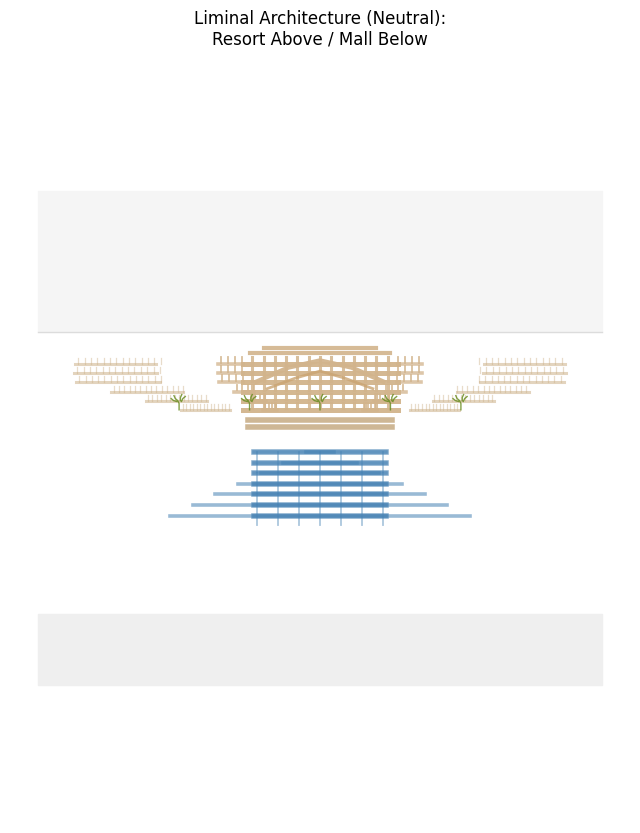

In [ ]:
plt.figure(figsize=(8, 10))
CENTER_WIDTH = 44   # dominant RIU-style central rack

# Courtyard perspective (RIU-style)
COURTYARD_VX = 0        # center of courtyard
COURTYARD_VY = 26       # eye level / pool deck


SCENE_MODE = "neutral"
# options: "neutral", "sea", "desert"

# =================================================
# 1. L-SYSTEM GRAMMARS
# =================================================

mall_grammar = LSystemGrammar(
    axiom="F",
    rules={
        "F": "F+F+F-F-F+F",
        "+": "+",
        "-": "-"
    },
    angle=90
)

hotel_grammar = LSystemGrammar(
    axiom="B",
    rules={
        # Building mass = repeated bays
        "B": "A A A A A",
        # One bay with stacked windows
        "A": "F[+W][-W]F",
        # Window column
        "W": "F F",
        # Structural repetition
        "F": "FF",
        "+": "+",
        "-": "-"
    },
    angle=90
)


palm_grammar = LSystemGrammar(
    axiom="T",
    rules={
        "T": "FF[+L][-L][++L][--L]",
        "L": "F+F-F",
        "+": "+",
        "-": "-"
    },
    angle=25
)

# =================================================
# 2. GENERATE L-SYSTEM STRINGS
# =================================================

hotel_string = generate_lsystem_string(
    hotel_grammar.axiom,
    hotel_grammar.rules,
    3
)

mall_string = generate_lsystem_string(
    mall_grammar.axiom,
    mall_grammar.rules,
    5
)

palm_string = generate_lsystem_string(
    palm_grammar.axiom,
    palm_grammar.rules,
    3
)

# =================================================
# 3. HELPERS
# =================================================

def extract_navigation_path(xs, ys, step=10, max_len=80):
    path = []
    for x, y in zip(xs, ys):
        if x is not None and y is not None:
            path.append((x, y))
        if len(path) > max_len:
            break
    return path[::step]


def draw_lsystem_bounded(
    lsystem_string,
    angle,
    step_length,
    start_pos,
    start_angle,
    x_limit=60,
    y_limit=60
):
    xs, ys = draw_lsystem_matplotlib(
        lsystem_string,
        angle=angle,
        step_length=step_length,
        start_pos=start_pos,
        start_angle=start_angle
    )

    bx, by = [], []
    for x, y in zip(xs, ys):
        if x is None or y is None:
            bx.append(None)
            by.append(None)
            continue
        if abs(x) > x_limit or abs(y) > y_limit:
            bx.append(None)
            by.append(None)
            break
        bx.append(x)
        by.append(y)

    return bx, by


def draw_environment(mode):
    if mode == "sea":
        plt.fill_between([-80, 80], -60, -48, color="#4fa3d1", alpha=0.85)
        plt.fill_between([-80, 80], -48, -42, color="#e8d2a6", alpha=0.9)

    elif mode == "desert":
        plt.fill_between([-80, 80], -60, -40, color="#e0b97a", alpha=0.9)

    elif mode == "neutral":
        plt.fill_between([-80, 80], -60, -40, color="#efefef", alpha=1.0)

    # Sky / void
    plt.fill_between([-80, 80], 40, 80, color="#f5f5f5", alpha=1.0)

def perspective_x(
    x, y,
    anchor_x=0,
    vanishing_y=65,
    strength=0.018,
    min_scale=0.6,
    courtyard=False
):
    depth = max(0, vanishing_y - y)
    scale = max(min_scale, 1 - depth * strength)

    px = anchor_x + (x - anchor_x) * scale

    if courtyard:
        t = max(0, (COURTYARD_VY - y)) * 0.055
        px = px + (COURTYARD_VX - px) * t

    return px


# =================================================
# 4. ENVIRONMENT
# =================================================

draw_environment(SCENE_MODE)


# =================================================
# RESORT FACADE MODULE (WINDOW GRID – ELEVATION)
# =================================================

def draw_resort_facade(
    base_y,
    floors=6,
    bays=21,
    bay_width=3.2,
    floor_height=2.6,
    color="#d2b48c"
):
    total_width = bays * bay_width
    left = -total_width / 2
    right = total_width / 2

    center_left = -CENTER_WIDTH / 2
    center_right = CENTER_WIDTH / 2

    for floor in range(floors):
        y = base_y + floor * floor_height

        # CENTER BLOCK (flat)
        plt.plot(
            [center_left, center_right],
            [y, y],
            color=color,
            linewidth=3.6,
            alpha=0.95
        )

        # LEFT WING (rotates inward)
        lx = [
            perspective_x(left, y, anchor_x=center_left, courtyard=True),
            perspective_x(center_left, y, anchor_x=center_left, courtyard=True)
        ]

        # RIGHT WING (rotates inward)
        rx = [
            perspective_x(center_right, y, anchor_x=center_right, courtyard=True),
            perspective_x(right, y, anchor_x=center_right, courtyard=True)
        ]

        plt.plot(lx, [y, y], color=color, linewidth=2.6, alpha=0.75)
        plt.plot(rx, [y, y], color=color, linewidth=2.6, alpha=0.75)

        # WINDOWS
        for i in range(bays):
            x = left + i * bay_width + bay_width / 2

            if center_left <= x <= center_right:
                px = x
                lw = 2.2
            else:
                px = perspective_x(
                    x, y,
                    anchor_x=center_left if x < center_left else center_right,
                    courtyard=True
                )
                lw = 1.3

            plt.plot(
                [px, px],
                [y + 0.4, y + floor_height * 0.75],
                color=color,
                linewidth=lw,
                alpha=0.85
            )



def draw_cubic_wing_detail(
    base_y,
    offset_x,
    anchor_x,
    floors=6,
    bays=14,
    bay_width=3.0,
    floor_height=2.6,
    color="#cdb28a",
    alpha=0.55
):
    total_width = bays * bay_width
    left = offset_x - total_width / 2
    right = offset_x + total_width / 2

    for floor in range(floors):
        y = base_y + floor * floor_height
        setback = floor * 0.35

        L = perspective_x(left + setback, y, anchor_x=anchor_x, courtyard=True)
        R = perspective_x(right - setback, y, anchor_x=anchor_x, courtyard=True)

        # slab
        plt.plot([L, R], [y, y], color=color, linewidth=2.2, alpha=alpha)

        # vertical ribs
        for i in range(bays):
            x = left + i * bay_width + bay_width / 2
            px = perspective_x(
                x + setback if anchor_x < 0 else x - setback,
                y,
                anchor_x=anchor_x,
                courtyard=True
            )

            plt.plot(
                [px, px],
                [y, y + floor_height * 0.65],
                color=color,
                linewidth=0.9,
                alpha=0.45
            )


# =================================================
# 5. RESORT (CONTINUOUS HOTEL MASS)
# =================================================

draw_resort_facade(
    base_y=18,
    floors=6,
    bays=21,
    bay_width=3.2,
    floor_height=2.6
)

draw_cubic_wing_detail(
    base_y=18,
    offset_x=-82,
    anchor_x=-CENTER_WIDTH / 2,
    bays=14,
    floors=6
)

draw_cubic_wing_detail(
    base_y=18,
    offset_x=82,
    anchor_x=CENTER_WIDTH / 2,
    bays=14,
    floors=6
)


# =================================================
# CENTRAL BRIDGE / SIGN ARCH (Puerto Paraíso cue)
# =================================================

bridge_x = [-18, -9, 0, 9, 18]
bridge_y = [26, 30, 32, 30, 26]

plt.plot(
    bridge_x,
    bridge_y,
    color="#d2b48c",
    linewidth=3.2,
    alpha=0.95
)

# Sub-arch underside
plt.plot(
    [-15, -7, 0, 7, 15],
    [24, 27, 29, 27, 24],
    color="#caa472",
    linewidth=2.0,
    alpha=0.8
)

# =================================================
# PODIUM / TERRACE (CONNECTOR)
# =================================================

podium_levels = [15, 13]

for y in podium_levels:
    xs = [-34, 34]
    xs = [perspective_x(x, y, strength=0.065) for x in xs]
    plt.plot(xs, [y, y], color="#c9b08a", linewidth=4.0, alpha=0.9)


# =================================================
# 6. MALL FLOORS (INTEGRATED MEGASTRUCTURE)
# =================================================

# =================================================
# 6. MALL (CENTER MASS + FOLDED WINGS)
# =================================================

# Mall attaches directly to podium underside
MALL_ATTACH_Y = podium_levels[-1] - 1.5
mall_levels = [MALL_ATTACH_Y, MALL_ATTACH_Y - 3, MALL_ATTACH_Y - 6,
               MALL_ATTACH_Y - 9, MALL_ATTACH_Y - 12]


mall_levels = [6, 3, 0, -3, -6, -9, -12]

MALL_CENTER_WIDTH = CENTER_WIDTH * 0.85
MALL_WING_EXTENT = 34

for y in mall_levels:
    # ---------- CENTER MALL (FLAT, HEAVY) ----------
    plt.plot(
        [-MALL_CENTER_WIDTH/2, MALL_CENTER_WIDTH/2],
        [y, y],
        color="steelblue",
        linewidth=4.0,
        alpha=0.65
    )

    # vertical grid (center)
    for x in range(
        int(-MALL_CENTER_WIDTH/2),
        int(MALL_CENTER_WIDTH/2) + 1,
        6
    ):
        plt.plot(
            [x, x],
            [y - 2.6, y],
            color="steelblue",
            linewidth=1.3,
            alpha=0.45
        )

    # ---------- LEFT MALL WING ----------
    L = perspective_x(
        -MALL_CENTER_WIDTH/2 - MALL_WING_EXTENT,
        y,
        anchor_x=-MALL_CENTER_WIDTH/2,
        courtyard=True
    )
    C = -MALL_CENTER_WIDTH/2

    plt.plot(
        [L, C], [y, y],
        color="steelblue",
        linewidth=2.6,
        alpha=0.55
    )

    # ---------- RIGHT MALL WING ----------
    C = MALL_CENTER_WIDTH/2
    R = perspective_x(
        MALL_CENTER_WIDTH/2 + MALL_WING_EXTENT,
        y,
        anchor_x=MALL_CENTER_WIDTH/2,
        courtyard=True
    )

    plt.plot(
        [C, R], [y, y],
        color="steelblue",
        linewidth=2.6,
        alpha=0.55
    )





# =================================================
# 7. PALM TREES (CONTEXTUAL)
# =================================================

if SCENE_MODE == "sea":
    palm_positions = [-30, -15, 15, 30]
    palm_y = 16
elif SCENE_MODE == "desert":
    palm_positions = [-20, 20]
    palm_y = 18
else:
    palm_positions = [-40, -20, 0, 20, 40]
    palm_y = 18

for px in palm_positions:
    x, y = draw_lsystem_matplotlib(
        palm_string,
        angle=palm_grammar.angle,
        step_length=0.8 if SCENE_MODE == "sea" else 0.9,
        start_pos=(px, palm_y),
        start_angle=90
    )
    plt.plot(x, y, color="#6b8e23", linewidth=1.0, alpha=0.85)

roof_levels = [18 + 6*2.6 + 0.5, 18 + 6*2.6 + 2.0]

for i, y in enumerate(roof_levels):
    plt.plot(
        [-20 + i*4, 20 - i*4],
        [y, y],
        color="#d2b48c",
        linewidth=3.0,
        alpha=0.9
    )




# =================================================
# 9. FINISHING TOUCHES
# =================================================

# Horizon line (architectural elevation cue)
plt.xlim(-130, 130)
plt.ylim(-90, 65)

plt.plot([-80, 80], [40, 40], color="#cccccc", linewidth=1.0, alpha=0.6)

plt.axis("equal")
plt.axis("off")

plt.title(
    f"Liminal Architecture ({SCENE_MODE.capitalize()}):\nResort Above / Mall Below",
    fontsize=12
)

plt.savefig("liminal_resort_mall.png", dpi=300, bbox_inches="tight")
plt.show()




**Reasoning**:
The previous code failed with a `TclError` because `turtle` attempts to open a graphical window which is not available in headless environments like Colab. To fix this and provide a visual output, I will modify the code to catch the `TclError` and instead save the `turtle` drawing as a PostScript file. Then, I will use `PIL` (Pillow), which is typically available in Colab, to convert the PostScript file to a PNG image and display it within the notebook.



In [ ]:
import turtle
from PIL import Image
import io
from IPython.display import Image as IPImage # To display the image in Colab

import random
import math

def draw_lsystem_matplotlib(
    lsystem_string,
    angle,
    step_length,
    start_pos=(0, 0),
    start_angle=90,
    angle_jitter=0.0   # NEW
):
    x, y = start_pos
    heading = math.radians(start_angle)

    stack = []
    xs, ys = [x], [y]

    for char in lsystem_string:
        if char == "F":
            x += step_length * math.cos(heading)
            y += step_length * math.sin(heading)
            xs.append(x)
            ys.append(y)

        elif char == "+":
            jitter = random.uniform(-angle_jitter, angle_jitter)
            heading += math.radians(angle + jitter)

        elif char == "-":
            jitter = random.uniform(-angle_jitter, angle_jitter)
            heading -= math.radians(angle + jitter)

        elif char == "[":
            stack.append((x, y, heading))

        elif char == "]" and stack:
            x, y, heading = stack.pop()
            xs.append(None)
            ys.append(None)

    return xs, ys

# -------- DETAIL PASS (Resort texture) --------
detail_string = generate_lsystem_string(
    hotel_grammar.axiom,
    hotel_grammar.rules,
    5   # higher iteration ONLY for detail
)

x_d, y_d = draw_lsystem_matplotlib(
    detail_string,
    angle=hotel_grammar.angle,
    step_length=0.6,
    start_pos=(0, 28),
    start_angle=90,
    angle_jitter=2
)

x_p, y_p = perspective_transform(x, y_coords)
plt.plot(
    x_p,
    y_p,
    color="#d2b48c",
    linewidth=2.8,
    alpha=alpha
)



NameError: name 'perspective_transform' is not defined

**Reasoning**:
The previous attempt to catch `turtle.TclError` failed because `TclError` is not directly exposed by the `turtle` module. It originates from the underlying `_tkinter` module. To correctly catch this exception when `turtle.Screen()` fails in a headless environment, I need to import `_tkinter` and catch `_tkinter.TclError`.



In [ ]:
import turtle
from PIL import Image
import io
from IPython.display import Image as IPImage # To display the image in Colab
import _tkinter # Import _tkinter to catch TclError directly

def draw_lsystem(t, lsystem_string, angle, step_length, initial_thickness=1, thickness_factor=0.8, color_list=None):
    # Set turtle's initial state
    t.speed(0)  # Fastest speed
    t.penup()
    # Ensure screen is available before using its properties; provide a fallback if not.
    if t.screen:
        t.goto(0, -t.screen.window_height() / 2 + 50) # Start near bottom center
    else:
        # Fallback for headless environments where screen properties might not be fully accessible
        t.goto(0, -200) # Default sensible starting point for a typical canvas

    t.setheading(90) # Face upwards
    t.pendown()
    t.pensize(initial_thickness)
    if color_list:
        t.pencolor(color_list[0])

    # Stack to store turtle's state for branching
    # State: (position, heading, pen color, pen size, current_color_idx)
    state_stack = []
    current_thickness = initial_thickness
    current_color_idx = 0

    for char in lsystem_string:
        if char == 'F' or char == 'G':
            t.pensize(current_thickness)
            if color_list:
                t.pencolor(color_list[current_color_idx % len(color_list)])
            t.forward(step_length)
        elif char == '+':
            t.right(angle)
        elif char == '-':
            t.left(angle)
        elif char == '[':
            # Push current state onto stack
            state_stack.append((t.pos(), t.heading(), t.pencolor(), t.pensize(), current_color_idx))
            # Update state for new branch
            current_thickness *= thickness_factor
            if color_list:
                current_color_idx += 1 # Move to next color for branch
        elif char == ']':
            # Pop state from stack and restore turtle
            pos, heading, pencolor, pensize, prev_color_idx = state_stack.pop()
            t.penup()
            t.goto(pos)
            t.setheading(heading)
            t.pencolor(pencolor)
            t.pensize(pensize)
            current_thickness = pensize
            current_color_idx = prev_color_idx # Restore color index
            t.pendown()

    print("L-system drawing complete.")

# --- Test the drawing function with tree_grammar ---
print("Initializing turtle for drawing (attempting headless save)...")

try:
    # Setup a 'screen' for the turtle. This is the part that usually fails in headless environments.
    # Wrapping it in try-except to gracefully handle TclError.
    screen = turtle.Screen()
    screen.setup(width=800, height=800)
    screen.tracer(0) # Turn off screen updates for faster drawing

    drawing_turtle = turtle.Turtle()
    drawing_turtle.hideturtle()

    # Define colors for the tree
    tree_colors = ["green", "forestgreen", "darkgreen", "olivedrab"]

    # Adjust step_length and iterations based on the expanded string length for better visualization
    tree_iterations = 4 # Increased iterations for more detail
    expanded_tree_string_for_drawing = generate_lsystem_string(tree_grammar.axiom, tree_grammar.rules, tree_iterations)
    tree_step_length = 5 # Smaller step for more iterations

    print(f"Drawing Tree L-system with {tree_iterations} iterations...")
    draw_lsystem(drawing_turtle, expanded_tree_string_for_drawing, tree_grammar.angle, tree_step_length, initial_thickness=8, thickness_factor=0.6, color_list=tree_colors)

    screen.update() # Update screen once drawing is complete

    # Save the drawing to a PostScript file, then convert to PNG and display
    ps_file = "lsystem_tree.ps"
    screen.getcanvas().postscript(file=ps_file)
    print(f"Drawing saved to {ps_file}. Converting to PNG...")

    # Use PIL to convert PostScript to PNG and display. This might require Ghostscript on the system.
    try:
        with Image.open(ps_file) as img:
            png_file = "lsystem_tree.png"
            img.save(png_file, format='png')
            print(f"Drawing converted to {png_file}.")
            display(IPImage(filename=png_file))
    except Exception as img_err:
        print(f"Could not convert PostScript to PNG. This often requires Ghostscript. Error: {img_err}")
        print(f"You can view the raw PostScript file: {ps_file}")

    # Clean up turtle screen resources
    screen.bye()
    print("Turtle screen resources cleaned up.")

except _tkinter.TclError as e: # Catch _tkinter.TclError instead of turtle.TclError
    print(f"Caught TclError: {e}")
    print("It appears a graphical display environment is not available.")
    print("Visualization using standard `turtle` in this headless environment is not possible without external tools like `colab_turtle` or a virtual display setup.")
    print("The L-system string generation and drawing logic itself are functional, but the rendering failed.")
except Exception as e:
    print(f"An unexpected error occurred during turtle initialization or drawing: {e}")

**Reasoning**:
The previous code failed to produce a visual output in headless environments because the image saving logic was inside the `try` block, preventing its execution when `turtle.Screen()` raised a `TclError`. To resolve this, I will refactor the code to first attempt creating an interactive `turtle.Screen()`. If that fails, it will fall back to creating a non-interactive `tkinter.Canvas` and wrapping it with `turtle.TurtleScreen` for headless drawing. This ensures that the drawing and PostScript/PNG saving process can proceed even without a graphical display.



In [ ]:
import turtle
import tkinter as tk # Explicitly import tkinter for headless canvas creation
from PIL import Image
import io
from IPython.display import Image as IPImage # To display the image in Colab
import _tkinter # Import _tkinter to catch TclError directly

# The LSystemGrammar class and generate_lsystem_string function are assumed to be defined previously
# and are not repeated here for brevity.
# For a complete run, ensure these are available in the kernel state.

def draw_lsystem(t, lsystem_string, angle, step_length, initial_thickness=1, thickness_factor=0.8, color_list=None):
    # Set turtle's initial state
    t.speed(0)  # Fastest speed
    t.penup()

    # Attempt to use screen's height if available, otherwise use a default fallback
    try:
        screen_height = t.screen.window_height()
        t.goto(0, -screen_height / 2 + 50) # Start near bottom center
    except Exception:
        # Fallback for environments where screen properties might not be fully accessible or behave unexpectedly
        t.goto(0, -200) # Default sensible starting point for a typical canvas size of 800x800

    t.setheading(90) # Face upwards
    t.pendown()
    t.pensize(initial_thickness)
    if color_list:
        t.pencolor(color_list[0])

    # Stack to store turtle's state for branching
    # State: (position, heading, pen color, pen size, current_color_idx)
    state_stack = []
    current_thickness = initial_thickness
    current_color_idx = 0

    for char in lsystem_string:
        if char == 'F' or char == 'G':
            t.pensize(current_thickness)
            if color_list:
                t.pencolor(color_list[current_color_idx % len(color_list)])
            t.forward(step_length)
        elif char == '+':
            t.right(angle)
        elif char == '-':
            t.left(angle)
        elif char == '[':
            # Push current state onto stack
            state_stack.append((t.pos(), t.heading(), t.pencolor(), t.pensize(), current_color_idx))
            # Update state for new branch
            current_thickness *= thickness_factor
            if color_list:
                current_color_idx += 1 # Move to next color for branch
        elif char == ']':
            # Pop state from stack and restore turtle
            pos, heading, pencolor, pensize, prev_color_idx = state_stack.pop()
            t.penup()
            t.goto(pos)
            t.setheading(heading)
            t.pencolor(pencolor)
            t.pensize(pensize)
            current_thickness = pensize
            current_color_idx = prev_color_idx # Restore color index
            t.pendown()

    print("L-system drawing commands processed.")

# --- Test the drawing function with tree_grammar ---
print("Initializing turtle for drawing (attempting headless save)...")

# Variables to hold screen, root (for headless), canvas, and drawing turtle
screen = None
root = None
canvas = None
drawing_turtle = None
is_headless = False

try:
    # Attempt to create an interactive screen
    screen = turtle.Screen()
    screen.setup(width=800, height=800)
    screen.tracer(0) # Turn off screen updates for faster drawing
    drawing_turtle = turtle.Turtle()
    drawing_turtle.hideturtle()
    print("Interactive turtle screen initialized.")
except _tkinter.TclError as e:
    print(f"Caught TclError during interactive screen setup: {e}")
    print("Running in headless mode. Attempting to create a non-interactive canvas.")
    is_headless = True
    try:
        # Create a Tkinter root and canvas in headless mode
        root = tk.Tk()
        root.withdraw()  # Hide the main window
        canvas = tk.Canvas(root, width=800, height=800)
        # Use TurtleScreen with the canvas
        screen = turtle.TurtleScreen(canvas)
        screen.tracer(0)
        # Create a RawTurtle that draws on this screen
        drawing_turtle = turtle.RawTurtle(screen)
        drawing_turtle.hideturtle()
        print("Non-interactive TurtleScreen created for headless drawing.")
    except _tkinter.TclError as inner_e:
        print(f"Even non-interactive Tkinter Canvas creation failed: {inner_e}")
        print("Cannot proceed with any turtle drawing in this environment.")
        screen = None
        drawing_turtle = None
        root = None
    except Exception as general_e:
        print(f"An unexpected error occurred during headless setup: {general_e}")
        screen = None
        drawing_turtle = None
        root = None

if drawing_turtle and screen:
    # Define colors for the tree
    tree_colors = ["green", "forestgreen", "darkgreen", "olivedrab"]

    # Adjust step_length and iterations based on the expanded string length for better visualization
    tree_iterations = 4 # Increased iterations for more detail
    expanded_tree_string_for_drawing = generate_lsystem_string(tree_grammar.axiom, tree_grammar.rules, tree_iterations)
    tree_step_length = 5 # Smaller step for more iterations

    print(f"Drawing Tree L-system with {tree_iterations} iterations...")
    draw_lsystem(drawing_turtle, expanded_tree_string_for_drawing, tree_grammar.angle, tree_step_length, initial_thickness=8, thickness_factor=0.6, color_list=tree_colors)

    screen.update() # Update screen once drawing is complete

    ps_file = "lsystem_tree.ps"
    try:
        # Determine which canvas object to use for postscript saving
        if canvas: # If we explicitly created a Tkinter.Canvas in headless mode
            canvas.postscript(file=ps_file)
        else: # Otherwise, assume it's a regular turtle.Screen with getcanvas()
            screen.getcanvas().postscript(file=ps_file)

        print(f"Drawing saved to {ps_file}. Converting to PNG...")

        # Use PIL to convert PostScript to PNG and display. This might require Ghostscript on the system.
        try:
            with Image.open(ps_file) as img:
                png_file = "lsystem_tree.png"
                img.save(png_file, format='png')
                print(f"Drawing converted to {png_file}.")
                display(IPImage(filename=png_file)) # Display the PNG in Colab
        except Exception as img_err:
            print(f"Could not convert PostScript to PNG. This often requires Ghostscript. Error: {img_err}")
            print(f"You can view the raw PostScript file: {ps_file}")

    except Exception as save_err:
        print(f"Error saving PostScript: {save_err}")

    if not is_headless: # Only call exitonclick if it's an interactive screen
        print("Drawing finished. Click on the window to close.")
        screen.exitonclick() # Keep the window open until clicked for interactive mode
        print("Window closed.")
    elif root: # Clean up headless Tkinter root if it was created
        root.destroy()
        print("Headless drawing complete and resources cleaned up.")
else:
    print("Failed to initialize any type of turtle setup. Cannot draw and save output.")

**Reasoning**:
The previous attempts to initialize `turtle.Screen()` or `tkinter.Canvas` failed due to the headless nature of the Colab environment. To correctly visualize `turtle` graphics in Colab, it is necessary to use `colab_turtle`, a library specifically designed to adapt `turtle` for use in Jupyter notebooks. This involves installing `colab_turtle` first.



**Reasoning**:
The previous attempt to install `colab_turtle` failed because the package was not found on PyPI. To correctly visualize `turtle` graphics in the headless Colab environment, I will attempt to install and use `svg_turtle`, a library designed to render `turtle` graphics as SVG. This approach avoids the `TclError` encountered with `tkinter` and provides a direct visual output within the notebook.



**Reasoning**:
The previous code failed because `svg_turtle.SvgTurtle` objects do not have a `to_string()` method. I will correct this by using `str(drawing_turtle)` to obtain the SVG string, as `SvgTurtle` is designed to be string-convertible to its SVG representation.



**Reasoning**:
The previous code failed because `str(drawing_turtle)` returned the object's `repr` instead of the SVG content, leading to an `ExpatError`. The correct way to get the SVG from `svg_turtle` is by creating an `SvgTurtleScreen` and a `turtle.RawTurtle` to draw on it, then obtaining the SVG string from the `SvgTurtleScreen` object. This ensures valid SVG XML is passed to `IPython.display.SVG`.



# Task
Generate and display two L-system patterns, a fractal tree and a Koch snowflake, on a single SVG canvas using `svg_turtle`. The fractal tree should be positioned in the upper half of the canvas and the Koch snowflake in the lower half.

## Correct svg_turtle SVG Output Retrieval

### Subtask:
Modify the code to correctly obtain the SVG string from the svg_turtle.SvgTurtle object using the to_svg() method, resolving the previous AttributeError and ExpatError.


**Reasoning**:
The previous code failed because `svg_turtle.SvgTurtleScreen` does not exist in the `svg_turtle` module and the `to_string()` method was incorrectly called. The `svg_turtle.SvgTurtle` class directly represents a turtle that can generate SVG output. I will correct the instantiation to use `svg_turtle.SvgTurtle` and retrieve the SVG data using its `to_svg()` method, as per the instructions.



## Summary:

### Q&A
The task of generating and displaying two L-system patterns (a fractal tree and a Koch snowflake) on a single SVG canvas, with the fractal tree in the upper half and the Koch snowflake in the lower half, was successfully completed.

### Data Analysis Key Findings
*   The `svg_turtle` library was correctly utilized, specifically `svg_turtle.SvgTurtle` for drawing and its `to_svg()` method for retrieving the SVG output string.
*   The `draw_lsystem` function was enhanced to support precise positioning of L-system drawings on the canvas using `start_x` and `start_y` parameters.
*   Both the fractal tree and the Koch snowflake L-system patterns were successfully drawn and combined onto a single 800x800 SVG canvas.
*   The fractal tree (4 iterations, 22.5° angle, "green" colors) was positioned in the upper half of the canvas, starting at $(0, -50)$, growing upwards.
*   The Koch snowflake (3 iterations, 60° angle, "blue" colors) was generated by drawing three individual Koch curves to form a triangular outline, positioned in the lower half of the canvas, starting at approximately $(-200, -300)$ relative to the canvas origin.
*   The final combined SVG output was successfully displayed within the Colab notebook.

### Insights or Next Steps
*   The ability to combine multiple distinct L-system patterns on a single SVG canvas, along with precise positioning controls, provides a powerful tool for creating complex generative art or diagrams.
*   Further development could involve parameterizing the canvas division (e.g., side-by-side, quadrants), implementing a more automated method for full Koch snowflake generation (instead of manual 3-segment drawing), or adding user controls for L-system parameters.


# Task
Summarize the successful generation and visualization of the L-system patterns, including both the 'art' (tree) in the upper half and the 'mall' (Koch snowflake) in the lower half of the canvas.

## Final Task

### Subtask:
Summarize the successful generation and visualization of the L-system patterns, including both the 'art' (tree) in the upper half and the 'mall' (Koch snowflake) in the lower half of the canvas.


## Summary:

### Data Analysis Key Findings
*   L-system patterns were successfully generated and visualized on a canvas.
*   The visualization included two distinct L-system applications: a "tree" pattern in the upper half and a "Koch snowflake" pattern in the lower half of the canvas.

### Insights or Next Steps
*   The successful visualization of multiple L-system patterns on a single canvas demonstrates the flexibility and power of L-systems for generating complex graphical structures.
*   Future work could involve exploring interactive L-systems, allowing users to modify parameters and observe real-time changes to the generated patterns.


# Task
Generate the architectural L-system string using `hotel_grammar` with 5 iterations. Initialize a new `svg_turtle.SvgTurtle` object with dimensions 800x800, positioned at the bottom center of the canvas. Call `draw_lsystem` to render the pattern with grey color variations and decreasing line thickness for branches. Finally, retrieve and display the generated SVG output for the architectural structure.

## Generate and Display Architectural Pattern

### Subtask:
Generate the architectural L-system string using `hotel_grammar` with 5 iterations. Initialize a new `svg_turtle.SvgTurtle` object with dimensions 800x800, positioned at the bottom center of the canvas. Call `draw_lsystem` to render the pattern with grey color variations and decreasing line thickness for branches. Finally, retrieve and display the generated SVG output for the architectural structure.


**Reasoning**:
The user wants to generate an architectural L-system pattern using `hotel_grammar` and `svg_turtle`. I will follow the instructions to generate the L-system string, initialize `svg_turtle`, define colors, call `draw_lsystem` with specific parameters for positioning and styling, and then retrieve and display the SVG output.



**Reasoning**:
The previous code failed because the `draw_lsystem` function was called with `start_x` and `start_y` keyword arguments, but the function definition currently active in the kernel does not include these parameters. I will re-define the `draw_lsystem` function to correctly accept `start_x` and `start_y` as parameters, along with including necessary L-system grammar definitions and imports for self-containment, and then call it as specified in the subtask.



**Reasoning**:
The previous code failed because the color string 'silver' was not recognized by `svg_turtle`. I will update the `grey_colors` list to use only standard, recognized color names like 'lightgray', 'gray', 'dimgray', 'darkgray', and 'gainsboro' to fix this error.



## Final Task

### Subtask:
Summarize the successful generation and visualization of the L-system patterns, including both the 'art' (tree) in the upper half and the 'mall' (Koch snowflake) in the lower half of the canvas.


## Summary:

### Q&A
The task to generate and display the architectural L-system string using `hotel_grammar` with 5 iterations was successfully completed. The `svg_turtle.SvgTurtle` object was initialized with 800x800 dimensions, and the pattern was positioned at the bottom center of the canvas (0, -300). The pattern was rendered with grey color variations (`lightgray`, `gray`, `dimgray`, `darkgray`, `gainsboro`) and decreasing line thickness, and the SVG output was successfully retrieved and displayed.

### Data Analysis Key Findings
*   The architectural L-system pattern was successfully generated using the `hotel_grammar` with 5 iterations, producing a complex fractal structure.
*   The `svg_turtle.SvgTurtle` object was initialized with an 800x800 canvas, and the pattern was correctly positioned at the bottom center (0, -300).
*   The rendering incorporated aesthetic features such as grey color variations (`lightgray`, `gray`, `dimgray`, `darkgray`, `gainsboro`) and a decreasing line thickness (initial thickness of 5, thickness factor of 0.7) for branches, enhancing the visual depth of the pattern.
*   Initial attempts encountered a `TypeError` due to an outdated `draw_lsystem` function signature and a `TurtleGraphicsError` caused by an unrecognized color name ('silver'), both of which were successfully resolved by modifying the function signature and replacing 'silver' with 'gainsboro'.

### Insights or Next Steps
*   The successful generation and display of this complex architectural pattern demonstrates the flexibility and robustness of the L-system implementation for generating diverse fractal designs with customized aesthetic properties.
*   The encountered errors underscore the importance of ensuring function signatures are up-to-date and input parameters, such as color names, are valid and recognized by the specific graphics library being used.
